In [ ]:
# Predicting the future price of Apple Company using LSTM:

In [ ]:
#Importing the reqd libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
import math

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 14.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=50743b45165f993225eebbb14ffba5525f92537e9258e0b4aab3f5c0670115d6
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
data = yf.download("AAPL", start="2012-01-01", end="2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data.shape

(2012, 6)

No handles with labels found to put in legend.


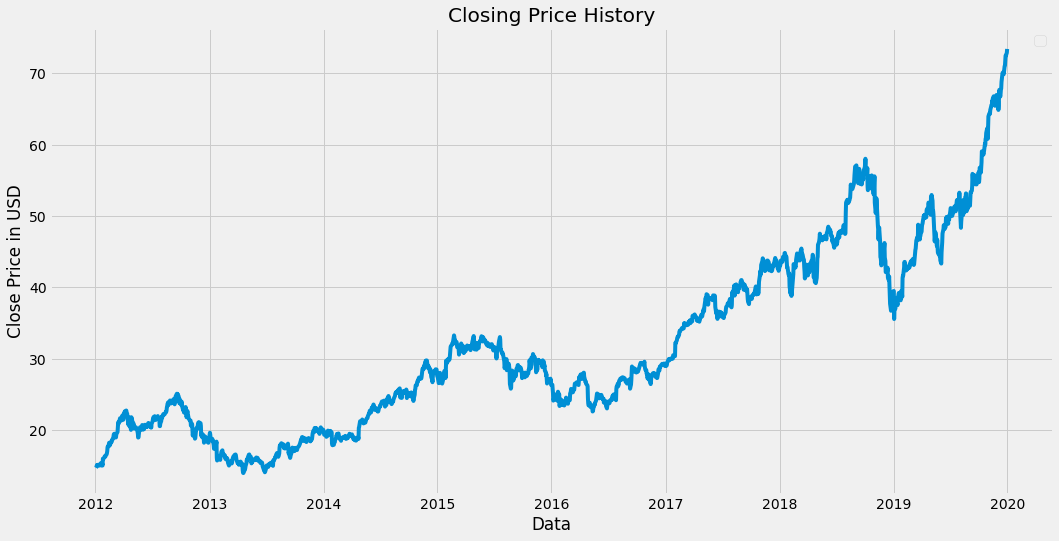

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(data['Close'])
plt.xlabel("Data")
plt.ylabel("Close Price in USD")
plt.legend()
plt.show()

In [ ]:
df=data["Close"].values

In [ ]:
df1=data.filter(["Close"])

In [ ]:
df1.values

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [72.44999695],
       [72.87999725],
       [73.41249847]])

In [ ]:
df

array([14.6867857 , 14.76571369, 14.92964268, ..., 72.44999695,
       72.87999725, 73.41249847])

In [ ]:
df=np.reshape(df,(-1,1))

In [ ]:
df

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [72.44999695],
       [72.87999725],
       [73.41249847]])

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
df_scaled=sc.fit_transform(df)

In [ ]:
df_scaled

array([[0.01243228],
       [0.01375958],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
df_scaled1=sc.fit_transform(df1)

In [ ]:
df_scaled1

array([[0.01243228],
       [0.01375958],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [ ]:
l=math.ceil(len(df_scaled)*0.8)

In [ ]:
l

1610

In [ ]:
trained_data=df_scaled1[0:l,:]

In [ ]:
trained_data

array([[0.01243228],
       [0.01375958],
       [0.01651631],
       ...,
       [0.55734467],
       [0.55646177],
       [0.55826959]])

The way the input data is presented to the model! CRUX of the whole project.

In [ ]:
X_train=[]
y_train=[]

for i in range(60,len(trained_data)):
  X_train.append(trained_data[i-60:i,0])
  y_train.append(trained_data[i,0])
  if i<=61:
    print(X_train)

    print(y_train)
    print("\n")

[array([0.01243228, 0.01375958, 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758536, 0.02052227,
       0.02317089, 0.02235408, 0.01787965, 0.02214988, 0.01794572,
       0.0337113 , 0.03249211, 0.03408368, 0.03752507, 0.03960912,
       0.03943495, 0.03879233, 0.04153103, 0.04410756, 0.04702647,
       0.05174113, 0.06164491, 0.06179505, 0.06730851, 0.07142856,
       0.06434759, 0.06707427, 0.06702022, 0.07466578, 0.07357869,
       0.07559067, 0.07920624, 0.08121825, 0.08701398, 0.09123612,
       0.09245533, 0.09288177, 0.08566265, 0.0839209 , 0.08417917,
       0.09096589, 0.09287577, 0.09697783, 0.10664737, 0.11954812,
       0.11713373, 0.11713972, 0.12646695, 0.12938586, 0.12730777,
       0.12540992, 0.12343396, 0.12999843, 0.1345029 , 0.13638876])]
[0.13172814323221588]


[array([0.01243228, 0.01375958, 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758536, 0.02052227,
       0.02317089, 0.02235408, 0.0

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
#Architecture of NN:
model=Sequential([
                 LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)),
                 LSTM(50,return_sequences=False),  
                 Dense(25),
                 Dense(1)                  
])

model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
49/49 [==============================] - 9s 9ms/step - loss: 0.0043
Epoch 2/10
49/49 [==============================] - 0s 7ms/step - loss: 3.0089e-04
Epoch 3/10
49/49 [==============================] - 0s 7ms/step - loss: 3.0526e-04
Epoch 4/10
49/49 [==============================] - 0s 7ms/step - loss: 2.9797e-04
Epoch 5/10
49/49 [==============================] - 0s 7ms/step - loss: 2.6491e-04
Epoch 6/10
49/49 [==============================] - 0s 7ms/step - loss: 2.6300e-04
Epoch 7/10
49/49 [==============================] - 0s 7ms/step - loss: 2.3267e-04
Epoch 8/10
49/49 [==============================] - 0s 7ms/step - loss: 2.2393e-04
Epoch 9/10
49/49 [==============================] - 0s 7ms/step - loss: 2.2093e-04
Epoch 10/10
49/49 [==============================] - 0s 7ms/step - loss: 2.0125e-04


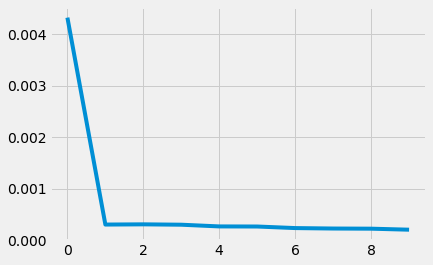

In [ ]:
plt.plot(range(len(model.history.history["loss"])),model.history.history["loss"])
plt.show()

In [ ]:
test_data=df_scaled[l-60:,:]

X_test=[]
y_test=df_scaled[l:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [ ]:
X_test=np.array(X_test)

In [ ]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
pred=model.predict(X_test)

In [ ]:
pred=sc.inverse_transform(pred)

Aiming to minimize RMSE is the Goal! 

In [ ]:
rmse=np.sqrt(np.mean(((pred- y_test)**2)))

In [ ]:
rmse

52.10355281738891

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


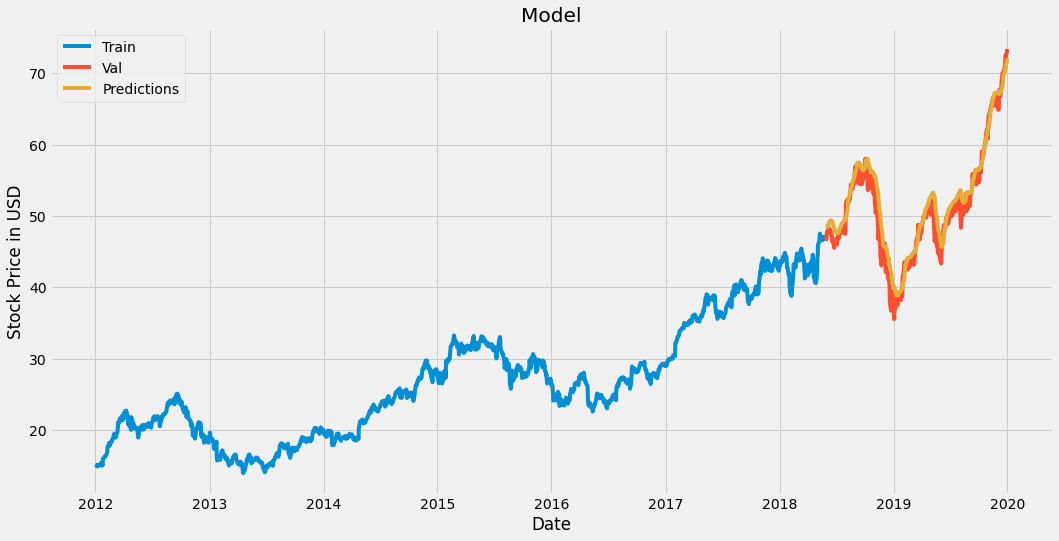

In [ ]:
#Visualising the predictions:

train=data[0:l]
valid=data[l:]
valid["Predictions"]=pred

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Stock Price in USD")
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"])
plt.show()